In [1]:
import reaktoro as rkt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define system with aq. species and gibbsite mineral
db = rkt.PhreeqcDatabase("phreeqc.dat")
solution = rkt.AqueousPhase(rkt.speciate("H O Ca S"))
solution.setActivityModel(rkt.ActivityModelDebyeHuckelPHREEQC())
Gypsum = rkt.MineralPhase("Gypsum")
Anhydrite = rkt.MineralPhase("Anhydrite")
system = rkt.ChemicalSystem(db, solution, Gypsum, Anhydrite)

# Create a solver with fixed T, P, and P_CO2 that can be charge balanced by adjusting pH
specs = rkt.EquilibriumSpecs(system)
specs.temperature()
specs.pressure()
specs.pH()
solver = rkt.EquilibriumSolver(specs)

# Set an initial state for the solution
state = rkt.ChemicalState(system)
state.temperature(25.0, "celsius")
state.pressure(1.0, "atm")
state.set("H2O", 1.0, "kg")
state.set("Gypsum", 1, "mol")
state.set("Anhydrite", 1, "mol")


# Set conditions
conditions = rkt.EquilibriumConditions(specs)
conditions.temperature(75, "celsius")
conditions.pressure(1, "atm")
conditions.pH(7.0)

# Equilibrate
solver.solve(state, conditions)

# print("FINAL STATE")
# print(state)

aprops = rkt.AqueousProps(state)

print("AQUEOUS PROPERTIES AT EQUILIBRIUM")
print(aprops)

AQUEOUS PROPERTIES AT EQUILIBRIUM
+---------------------------------+-------------+-------+
| Property                        |       Value |  Unit |
+---------------------------------+-------------+-------+
| Temperature                     |    348.1500 |     K |
| Pressure                        |      1.0132 |   bar |
| Ionic Strength (Effective)      |      0.0243 | molal |
| Ionic Strength (Stoichiometric) |      0.0363 | molal |
| pH                              |      7.0000 |       |
| pE                              |     -3.8788 |       |
| Eh                              |     -0.2680 |     V |
| Charge Molality                 | -2.1208e-06 | molal |
| Element Molality:               |             |       |
| :: S                            |  9.0778e-03 | molal |
| :: Ca                           |  9.0778e-03 | molal |
| Species Molality:               |             |       |
| :: H+                           |  1.1240e-07 | molal |
| :: SO4-2                        |  6

In [6]:
print(aprops.saturationIndex("Anhydrite"))
print(aprops.saturationIndex("Gypsum"))

-2.28296e-09
-0.194987


In [8]:
# Define system with aq. species and gibbsite mineral
db = rkt.PhreeqcDatabase("phreeqc.dat")
solution = rkt.AqueousPhase(rkt.speciate("H O Ca S"))
solution.setActivityModel(rkt.ActivityModelDebyeHuckelPHREEQC())
Gypsum = rkt.MineralPhase("Gypsum")
Anhydrite = rkt.MineralPhase("Anhydrite")
system = rkt.ChemicalSystem(db, solution, Gypsum, Anhydrite)

# Create a solver with fixed T, P, and P_CO2 that can be charge balanced by adjusting pH
specs = rkt.EquilibriumSpecs(system)
specs.temperature()
specs.pressure()
specs.pH()
solver = rkt.EquilibriumSolver(specs)

# Set an initial state for the solution
state = rkt.ChemicalState(system)
state.temperature(25.0, "celsius")
state.pressure(1.0, "atm")
state.set("H2O", 1.0, "kg")
state.set("Gypsum", 1, "mol")
state.set("Anhydrite", 1, "mol")

def SatIndexCalc(T):
    # Set conditions
    conditions = rkt.EquilibriumConditions(specs)
    conditions.temperature(T, "celsius")
    conditions.pressure(1, "atm")
    conditions.pH(7.0)

    # Equilibrate
    solver.solve(state, conditions)

    # print("FINAL STATE")
    # print(state)

    aprops = rkt.AqueousProps(state)

    # print("AQUEOUS PROPERTIES AT EQUILIBRIUM")
    # print(aprops)
    return [aprops.saturationIndex("Gypsum")[0], aprops.saturationIndex("Anhydrite")[0]]

T_arr = np.linspace(25,75)
output = [SatIndexCalc(T) for T in T_arr]
output

[[-1.651584282608155e-09, -0.3016874154181105],
 [-2.854455033905756e-09, -0.2904909241813338],
 [-2.0637497141256396e-09, -0.2793460931723945],
 [-1.347839567272025e-09, -0.2682523249256505],
 [-7.011829377060315e-10, -0.25720902806198903],
 [-1.061763165470787e-09, -0.24621562021158683],
 [3.6579366906236762e-09, -0.23527151990312786],
 [8.736372745831025e-10, -0.22437617226724005],
 [1.2920352368109085e-09, -0.2135290067877472],
 [1.6640207300090071e-09, -0.2027294746068427],
 [1.9932763022172812e-09, -0.19197703114052705],
 [2.283286046641176e-09, -0.18127113924551247],
 [2.537195608107034e-09, -0.17061126912006813],
 [2.7580611967651736e-09, -0.1599968982059868],
 [2.9486406097830312e-09, -0.14942751109193186],
 [3.1114969031439023e-09, -0.13890259941754815],
 [3.2490662066683606e-09, -0.1284216617786426],
 [3.3635375090445055e-09, -0.11798420363373045],
 [3.457009133381659e-09, -0.1075897372110045],
 [3.531380082457055e-09, -0.0972377814168232],
 [3.5884140755980657e-09, -0.08692

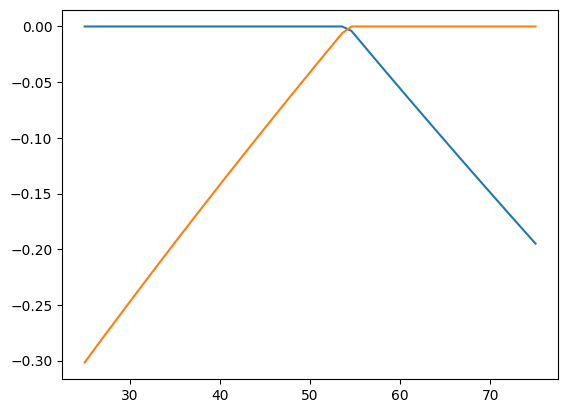

In [12]:
plt.plot(T_arr, np.array(output))